In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Yu Mincho']
mpl.rcParams['axes.unicode_minus'] = False
# sns.set(font='Microsoft YaHei')  # 解决Seaborn中文显示问题

In [5]:
# 构建poi的dataframe用于后面存储相关poi信息
# 经纬度用于（1）poi数据获取（2）merge原数据集和poi数据集
# df = pd.read_csv('http://myeconomics.cn/geek/pyfile/%E6%B7%B1%E5%9C%B3%E4%BA%8C%E6%89%8B%E6%88%BF%E5%88%86%E6%9E%90%E6%95%B0%E6%8D%AE.csv').reset_index(drop=True)
df = pd.read_csv('http://myeconomics.cn/geek/pyfile/SZershoufangdata.csv').reset_index(drop=True)
# df[['经度','纬度']] = df3[['经度','纬度']].round(6) # 由于先前将经纬度转为了float，现在统一取后六位

# 首次运行，用locations存储经纬度集合，构建poi兴趣点df
# locations = set((row[1],row[2]) for row in df3[['经度','纬度']].itertuples())
# poi = pd.DataFrame(list(locations),columns=['经度','纬度'])

In [6]:
# df = df.drop(['成交时间','调价','带看','关注','浏览','房屋年限','挂牌时间','梯户比例','交易权属',
#                 '建筑结构','挂牌价格','成交单价','成交周期','区域','子区域','套内面积','楼盘名称'],axis=1)

In [7]:
df = df.drop(['Unnamed: 0', '成交时间','房屋年限','浏览', '挂牌时间','梯户比例','交易权属',
              '建筑结构','挂牌价格','成交单价','成交周期','子区域','套内面积','楼盘名称'],axis=1)

In [11]:
df.columns = ['経度', '緯度', '取引価格', 'エリア', '価格調整', '実地回覧数', 'フォロー数',
              '住宅タイプ', '階数', '建築面積', '住宅構造', '建築タイプ', '住宅の向き', '完成年',
              '装飾状況', 'エレベーターあり', '住居目的', '住居権利帰属', '総階数']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20541 entries, 0 to 20540
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   経度        20541 non-null  float64
 1   緯度        20541 non-null  float64
 2   取引価格      20541 non-null  float64
 3   エリア       20541 non-null  object 
 4   価格調整      20541 non-null  float64
 5   実地回覧数     20541 non-null  float64
 6   フォロー数     20541 non-null  float64
 7   住宅タイプ     20541 non-null  object 
 8   階数        20541 non-null  object 
 9   建築面積      20541 non-null  float64
 10  住宅構造      17149 non-null  object 
 11  建築タイプ     20478 non-null  object 
 12  住宅の向き     19439 non-null  object 
 13  完成年       20302 non-null  float64
 14  装飾状況      20541 non-null  object 
 15  エレベーターあり  20483 non-null  object 
 16  住居目的      20541 non-null  object 
 17  住居権利帰属    18070 non-null  object 
 18  総階数       20541 non-null  int64  
dtypes: float64(8), int64(1), object(10)
memory usage: 3.0+ MB


In [14]:
df.isnull().sum()

経度             0
緯度             0
取引価格           0
エリア            0
価格調整           0
実地回覧数          0
フォロー数          0
住宅タイプ          0
階数             0
建築面積           0
住宅構造        3392
建築タイプ         63
住宅の向き       1102
完成年          239
装飾状況           0
エレベーターあり      58
住居目的           0
住居権利帰属      2471
総階数            0
dtype: int64

In [15]:
df.T.head(35)

,0,1,2,3,4,5,6,7,8,9,...,20531,20532,20533,20534,20535,20536,20537,20538,20539,20540
経度,114.134,114.14,114.133,114.139,114.088,114.14,114.147,114.146,114.116,114.14,...,114.032,114.064,114.064,114.041,114.019,114.025,114.055,114.027,114.028,114.028
緯度,22.5476,22.5555,22.5463,22.5531,22.5822,22.5536,22.5594,22.5513,22.5575,22.5796,...,22.6367,22.6072,22.6072,22.6527,22.635,22.6394,22.6795,22.6403,22.6582,22.6337
取引価格,174,449,261,365,848,284,588,186,306,475,...,665,527,565,773,625,670,401,395,206,728
エリア,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,...,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区
価格調整,2,5,0,0,3,4,0,0,0,0,...,7,16,0,0,1,2,1,1,0,0
実地回覧数,2,98,45,0,22,46,76,1,3,40,...,172,109,39,7,4,6,86,25,8,2
フォロー数,30,27,25,0,24,20,2,8,5,33,...,83,160,23,16,0,3,21,11,20,0
住宅タイプ,1室1厅1厨1卫,2室1厅1厨1卫,2室1厅1厨1卫,2室1厅1厨1卫,4室2厅1厨2卫,1室1厅1厨1卫,3室1厅1厨1卫,1室0厅1厨1卫,1室1厅1厨1卫,2室1厅1厨1卫,...,4室2厅1厨2卫,3室2厅1厨1卫,3室2厅1厨2卫,5室2厅1厨2卫,3室1厅1厨2卫,4室2厅1厨2卫,3室1厅1厨1卫,2室2厅1厨1卫,1室1厅1厨1卫,3室1厅1厨2卫
階数,低楼层,中楼层,高楼层,中楼层,低楼层,中楼层,中楼层,中楼层,高楼层,高楼层,...,低楼层,低楼层,中楼层,中楼层,中楼层,中楼层,高楼层,低楼层,中楼层,高楼层
建築面積,45.69,55.82,55.71,65.37,163.39,41.25,93.54,54.56,46,72.16,...,108.94,87.08,86.69,126,87.8,87.96,85.8,54,40.58,87.44


In [16]:
# 异常值处理
def show_error(df,col,whis=1.5,show=False):
        '''
        显示上下限异常值数量，可选显示示例异常数据
        df：数据源
        col：字段名
        whis：默认1.5，对应1.5倍iqr
        show：是否显示示例异常数据
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + whis * iqr # 上界
        lower_bound = df[col].quantile(0.25) - whis * iqr # 下界
        # print(iqr,upper_bound,lower_bound)
        print('【',col,'】上界异常值总数：',df[col][df[col] > upper_bound].count())
        if show:
            print('异常值示例：\n',df[df[col] > upper_bound].head(5).T)
        print('【',col,'】下界异常值总数：',df[col][df[col] < lower_bound].count())
        if show:
            print('异常值示例：\n',df[df[col] < lower_bound].head(5).T)
        print('- - - - - - ')
        
def drop_error(df,col,whis=1.5):
        '''
        删除上下限异常值数量
        df：数据源
        col：字段名
        whis：默认1.5，对应1.5倍iqr
        '''
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) + whis*iqr # 上界
        lower_bound = df[col].quantile(0.25) - whis*iqr # 下界
        data_del = df[col][(df[col] > upper_bound) | (df[col] < lower_bound)].count()
        data = df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
        print(f'【{col}】总剔除数据量：',data_del)
        return data.reset_index(drop=True)


In [17]:
# 处理空值
def fill_with_neighbor_or_mode(df,col):
    '''
    用相同经纬度的楼盘数据做填充，如果没有同类信息，则用整体众数填充。
    df：数据源
    col：字段名
    '''
#     loc = df[df[col].isna()][['经度','纬度']]
#     loclist = set((l[1],l[2]) for l in loc.itertuples())
    mode_number = df[col].mode()[0]
    df[col].fillna(mode_number, inplace=True)
    # print(mode_number)
#     for i in loclist:
#         try:
#             r = df[(df.经度 == i[0]) & (df.纬度 == i[1])][col].mode()[0]
#             df.loc[(df.经度 == i[0]) & (df.纬度 == i[1]) & df[col].isna(),col] = r
#         except Exception as e:
#             df.loc[(df.经度 == i[0]) & (df.纬度 == i[1]) & df[col].isna(),col] = mode_number
    print(f'fill_with_neighbor_or_mode - {col} , done!')

In [28]:
# 房屋户型哑变量获取
def roomtype_get_dummies(df):
    '''
    房屋户型哑变量获取
    df：数据源
    '''
    roomtype = df.住宅タイプ.str.extract('(?P<室>\d+)室(?P<厅>\d+)厅(?P<厨>\d+)厨(?P<卫>\d+)卫').astype(np.float)
    print('roomtype_get_dummies , done!')
    return pd.merge(df,roomtype,how='left',left_index=True,right_index=True).drop('住宅タイプ',axis=1)

In [19]:
# 住宅の向き哑变量获取
def orientation_get_dummies(df):
    '''
    住宅の向き哑变量获取
    df：数据源
    '''
    l = set()
    for i in df.住宅の向き.str.split(' '):
        l.update(i)
    d = pd.DataFrame(np.zeros((len(df),len(l)),dtype=np.int8),
                        columns=[f'住宅の向き_{i}' for i in l])
    df = df.join(d)
    for n in l:
        df.loc[df.住宅の向き.str.contains(n),f'住宅の向き_{n}'] = 1
    print('orientation_get_dummies , done!')
    return df.drop('住宅の向き',axis=1)

In [20]:
# 其他哑变量获取
def dummies_getting(df,col):
    '''
    其他哑变量获取
    df：数据源
    col：字段名
    '''
    df = pd.get_dummies(df,columns=col)
    print(f'dummies_getting - {col} , done!')
    return df

In [21]:
df.isnull().sum().sort_values(ascending=False)

住宅構造        3392
住居権利帰属      2471
住宅の向き       1102
完成年          239
建築タイプ         63
エレベーターあり      58
総階数            0
実地回覧数          0
緯度             0
取引価格           0
エリア            0
価格調整           0
建築面積           0
フォロー数          0
住宅タイプ          0
階数             0
装飾状況           0
住居目的           0
経度             0
dtype: int64

In [23]:
# 先处理空值
# df.loc[df.产权年限 == '未知','产权年限'] = np.nan
# ['户型结构','建筑类型','建成年代','配备电梯','房权所属', '房屋朝向']
for i in ['住宅構造', '住居権利帰属', '住宅の向き', '完成年', '建築タイプ', 'エレベーターあり']:
    fill_with_neighbor_or_mode(df,i)
# df.产权年限 = df.产权年限.str[:2].astype(np.int8)

fill_with_neighbor_or_mode - 住宅構造 , done!
fill_with_neighbor_or_mode - 住居権利帰属 , done!
fill_with_neighbor_or_mode - 住宅の向き , done!
fill_with_neighbor_or_mode - 完成年 , done!
fill_with_neighbor_or_mode - 建築タイプ , done!
fill_with_neighbor_or_mode - エレベーターあり , done!


In [24]:
df.isnull().sum().sort_values(ascending=False)

総階数         0
階数          0
緯度          0
取引価格        0
エリア         0
価格調整        0
実地回覧数       0
フォロー数       0
住宅タイプ       0
建築面積        0
住居権利帰属      0
住宅構造        0
建築タイプ       0
住宅の向き       0
完成年         0
装飾状況        0
エレベーターあり    0
住居目的        0
経度          0
dtype: int64

【 取引価格 】上界异常值总数： 375
【 取引価格 】下界异常值总数： 0
- - - - - - 
【 建築面積 】上界异常值总数： 138
【 建築面積 】下界异常值总数： 0
- - - - - - 
【 総階数 】上界异常值总数： 0
【 総階数 】下界异常值总数： 0
- - - - - - 
【 完成年 】上界异常值总数： 1
【 完成年 】下界异常值总数： 0
- - - - - - 


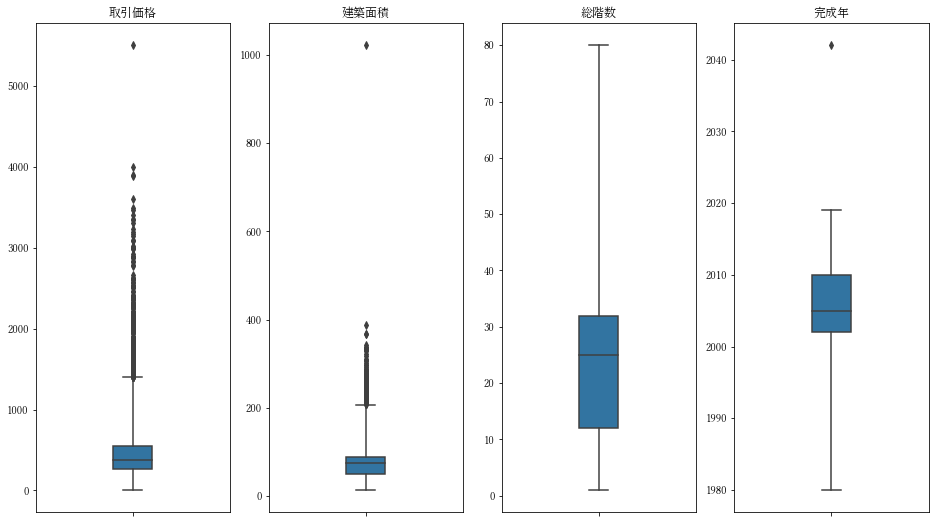

In [25]:
# 查看一下最终会保留的连续值字段异常值情况，注意这里whis是3
plt.figure(figsize=(16,9))
for n,i in enumerate(['取引価格', '建築面積', '総階数','完成年']):
    plt.subplot(1,4,n+1)
    plt.title(i)
    sns.boxplot(df[i],orient='v',width=0.2,whis=3)    
    plt.ylabel('')
for i in ['取引価格', '建築面積', '総階数','完成年']:        
    show_error(df,i,whis=3)  

In [26]:
# 处理异常值 
for i in ['取引価格', '建築面積', '総階数','完成年']:
    df = drop_error(df,i,whis=3)    # 注意这里whis是3

【取引価格】总剔除数据量： 375
【建築面積】总剔除数据量： 33
【総階数】总剔除数据量： 0
【完成年】总剔除数据量： 1


In [29]:
# 房屋户型哑变量获取
df = roomtype_get_dummies(df)

roomtype_get_dummies , done!


In [30]:
# 房屋朝向哑变量获取
df = orientation_get_dummies(df)

orientation_get_dummies , done!


In [31]:
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,20122,20123,20124,20125,20126,20127,20128,20129,20130,20131
経度,114.134,114.14,114.133,114.139,114.088,114.14,114.147,114.146,114.116,114.14,...,114.032,114.064,114.064,114.041,114.019,114.025,114.055,114.027,114.028,114.028
緯度,22.5476,22.5555,22.5463,22.5531,22.5822,22.5536,22.5594,22.5513,22.5575,22.5796,...,22.6367,22.6072,22.6072,22.6527,22.635,22.6394,22.6795,22.6403,22.6582,22.6337
取引価格,174,449,261,365,848,284,588,186,306,475,...,665,527,565,773,625,670,401,395,206,728
エリア,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,罗湖区,...,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区,龙华区
価格調整,2,5,0,0,3,4,0,0,0,0,...,7,16,0,0,1,2,1,1,0,0
実地回覧数,2,98,45,0,22,46,76,1,3,40,...,172,109,39,7,4,6,86,25,8,2
フォロー数,30,27,25,0,24,20,2,8,5,33,...,83,160,23,16,0,3,21,11,20,0
階数,低楼层,中楼层,高楼层,中楼层,低楼层,中楼层,中楼层,中楼层,高楼层,高楼层,...,低楼层,低楼层,中楼层,中楼层,中楼层,中楼层,高楼层,低楼层,中楼层,高楼层
建築面積,45.69,55.82,55.71,65.37,163.39,41.25,93.54,54.56,46,72.16,...,108.94,87.08,86.69,126,87.8,87.96,85.8,54,40.58,87.44
住宅構造,平层,平层,平层,平层,平层,平层,平层,平层,平层,平层,...,平层,平层,平层,平层,平层,平层,平层,平层,平层,平层


In [22]:
df.columns

Index(['経度', '緯度', '取引価格', 'エリア', '価格調整', '実地回覧数', 'フォロー数', '住宅タイプ', '階数',
       '建築面積', '住宅構造', '建築タイプ', '住宅の向き', '完成年', '装飾状況', 'エレベーターあり', '住居目的',
       '住居権利帰属', '総階数'],
      dtype='object')

In [33]:
# 其他哑变量获取
columns = ['階数', '住宅構造','建築タイプ','装飾状況', 'エレベーターあり','住居目的','住居権利帰属', 'エリア']
df = dummies_getting(df,columns)

dummies_getting - ['階数', '住宅構造', '建築タイプ', '装飾状況', 'エレベーターあり', '住居目的', '住居権利帰属', 'エリア'] , done!


In [34]:
df.shape

(20132, 56)

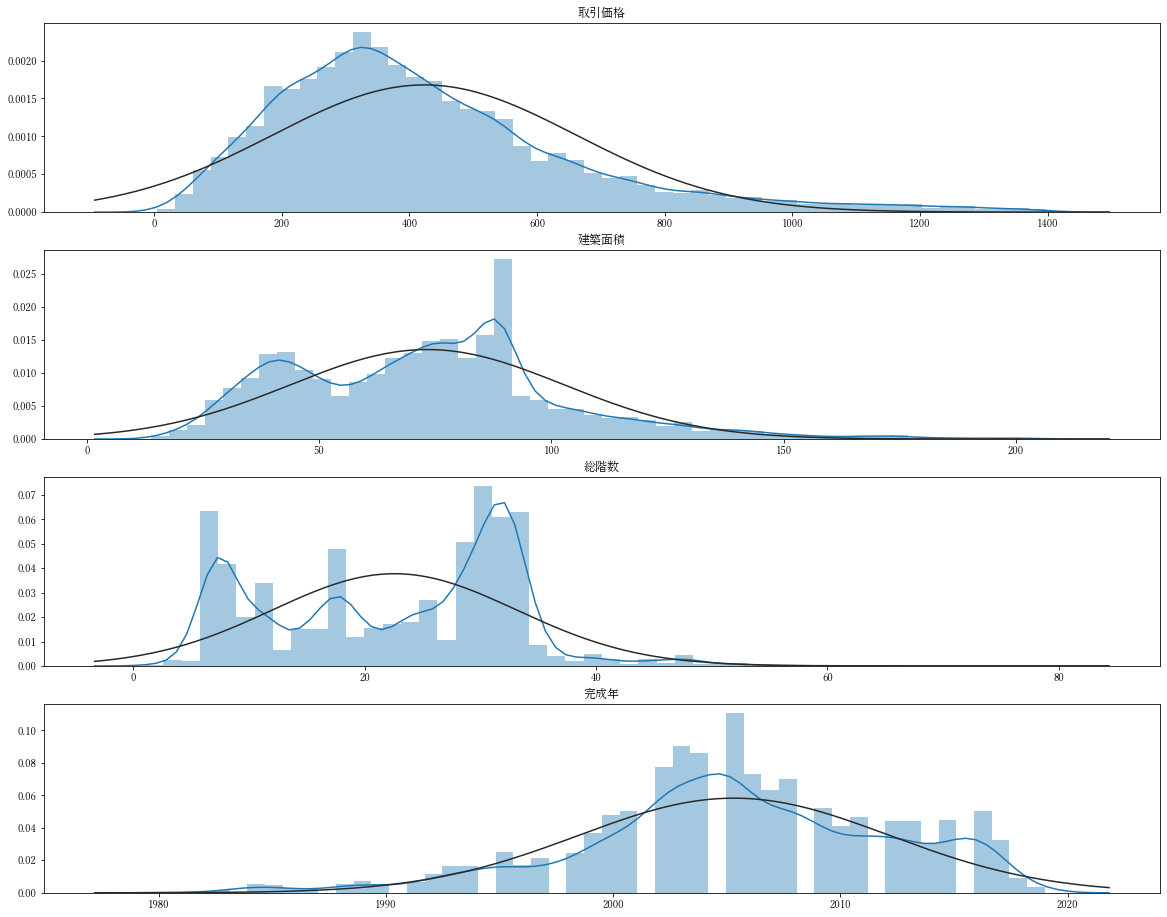

In [51]:
# 整体分布偏态情况减小
plt.figure(figsize=(20,16))
for n,i in enumerate(['取引価格', '建築面積', '総階数','完成年']):
    plt.subplot(4,1,n+1)
    plt.title(i)
    sns.distplot(df[i], fit=norm)
    plt.xlabel('')
    plt.ylabel('')

In [36]:
cols = ['室', '厅', '厨', '卫']
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

## 3.3 训练模型

In [37]:
X = df.drop('取引価格', axis=1)
y = df['取引価格']

In [38]:
def get_best_model_and_accuracy(model, params, X, y, n_jobs=None, verbose=0):
    grid = GridSearchCV(model, params, error_score=0.,
    n_jobs=n_jobs, verbose=verbose)# 如果报错，结果是0
    grid.fit(X, y)
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_)) # 拟合的平均时间(秒)
    print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))) # 预测的平均时间(秒)
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [39]:
lr = LinearRegression()
lr_params = {'fit_intercept': [True, False]}

get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.6993958330358265
Best Parameters: {'fit_intercept': True}
Average Time to Fit (s):0.086
Average Time to Score (s):0.007


In [40]:
tree = DecisionTreeRegressor(random_state=42)
tree_params = {
    'max_depth':[None, 1, 3, 5, 7]
}
get_best_model_and_accuracy(tree, tree_params, X, y)

Best Accuracy: 0.7330303826283412
Best Parameters: {'max_depth': 7}
Average Time to Fit (s):0.199
Average Time to Score (s):0.008


In [41]:
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
svr_params = {
    'C': [1e-2, 1e-1, 1e0, 1e1, 1e2],
}
get_best_model_and_accuracy(svr, svr_params, X, y, verbose=1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.9min finished


Best Accuracy: 0.45095316130135865
Best Parameters: {'C': 0.01}
Average Time to Fit (s):4.664
Average Time to Score (s):0.008


In [43]:
knn = KNeighborsRegressor()
knn_params = {'n_neighbors': [1, 3, 5, 7]}
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.4076954480368837
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s):0.649
Average Time to Score (s):0.6


In [52]:
knn_pipe = Pipeline([
    ('scale', StandardScaler()), ('knn', knn)
])
knn_pipe_params = {'knn__n_neighbors': [1, 3, 5, 7]}
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

Best Accuracy: 0.615848179455442
Best Parameters: {'knn__n_neighbors': 7}
Average Time to Fit (s):2.35
Average Time to Score (s):8.816


In [44]:
tree = DecisionTreeRegressor(random_state=42)
tree_params = {
    'max_depth':[7, 9, 11, 13]
}
get_best_model_and_accuracy(tree, tree_params, X, y)

Best Accuracy: 0.7633749101969677
Best Parameters: {'max_depth': 9}
Average Time to Fit (s):0.282
Average Time to Score (s):0.009


In [56]:
from sklearn.preprocessing import PolynomialFeatures
tree_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), ('clf', tree)
])
tree_pipe_params = {
    'clf__max_depth':[7, 9, 11, 13]
}
get_best_model_and_accuracy(tree_pipe, tree_pipe_params, X, y)

Best Accuracy: 0.7318970929864299
Best Parameters: {'clf__max_depth': 9}
Average Time to Fit (s):14.343
Average Time to Score (s):0.307


In [42]:
forest = RandomForestRegressor(random_state=42)
forest_params = {'max_features':['auto'], 'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 1, 3, 5, 7]}
get_best_model_and_accuracy(forest, forest_params, X, y, verbose=1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 17.9min finished


Best Accuracy: 0.8595778768861496
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
Average Time to Fit (s):10.648
Average Time to Score (s):0.074


In [ ]:
forest = RandomForestRegressor(random_state=42)
forest_params = {'max_features':['auto'], 'n_estimators': [100, 200, 300, 500], 'max_depth': [None, 1, 3, 5, 7]}
get_best_model_and_accuracy(forest, forest_params, X, y, verbose=1)

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from copy import deepcopy

forest_pipe_params = {'model__n_estimators':[100, 200, 300, 500],
                     'model__max_depth': [None, 1, 3, 5, 7]}
k_best = SelectKBest(f_classif)
select_k_pipe = Pipeline([
    ('k_best', k_best), ('model', forest)
])
select_k_pipe_params = deepcopy(forest_pipe_params)
select_k_pipe_params.update(
    {"k_best__k": [50, 100, 150, 200]}
)

get_best_model_and_accuracy(select_k_pipe, select_k_pipe_params, X, y, verbose=10)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=10 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=10, score=0.753, total=   1.0s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=10 ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=10, score=0.497, total=   0.9s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=10 ......


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=10, score=0.529, total=   0.9s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=10 ......


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.7s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=10, score=0.705, total=   1.2s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=10 ......


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=10, score=-0.165, total=   1.0s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=50 ......


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=50, score=0.763, total=   3.8s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=50 ......


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=50, score=0.511, total=   3.0s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=50 ......


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.7s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=50, score=0.548, total=   3.1s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=50 ......


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.8s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=50, score=0.723, total=   4.1s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=50 ......


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.9s remaining:    0.0s


[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=50, score=-0.115, total=   2.8s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=100, score=0.761, total=   7.1s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=100, score=0.510, total=   6.3s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=100, score=0.551, total=   6.1s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=100, score=0.724, total=   7.5s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=5, model__max_depth=None, model__n_estimators=100, score=-0.118, total=   5.0s
[CV] k_best__k=5, model__max_depth=None, model__n_estimators=200 .....
[CV]  k_b

[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=10, score=0.660, total=   0.5s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=10, score=0.514, total=   0.5s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=10, score=0.573, total=   0.5s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=10, score=0.574, total=   0.5s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=10, score=0.126, total=   0.5s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=5, model__max_depth=5, model__n_estimators=50, score=0.661, total=   1.6s
[CV] k_best__k=5, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=5, model__max_dept

[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=100, score=0.822, total=  12.7s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=100, score=0.846, total=  13.0s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=100, score=0.735, total=  10.9s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=100 .....
[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=100, score=0.326, total=  12.6s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=200 .....
[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=200, score=0.759, total=  19.8s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=200 .....
[CV]  k_best__k=7, model__max_depth=None, model__n_estimators=200, score=0.822, total=  29.6s
[CV] k_best__k=7, model__max_depth=None, model__n_estimators=200 .....
[CV]  k_be

[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=10, score=0.755, total=   1.0s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=10, score=0.597, total=   0.7s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=10 .........
[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=10, score=0.072, total=   0.7s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=50, score=0.643, total=   2.3s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=50, score=0.713, total=   2.1s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=7, model__max_depth=5, model__n_estimators=50, score=0.756, total=   1.5s
[CV] k_best__k=7, model__max_depth=5, model__n_estimators=50 .........
[CV]  k_best__k=7, model__max_dept

[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=100, score=0.822, total=  13.2s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=100 ....
[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=100, score=0.382, total=  11.0s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=200 ....
[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=200, score=0.860, total=  31.0s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=200 ....
[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=200, score=0.825, total=  29.6s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=200 ....
[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=200, score=0.885, total=  32.4s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=200 ....
[CV]  k_best__k=10, model__max_depth=None, model__n_estimators=200, score=0.823, total=  34.3s
[CV] k_best__k=10, model__max_depth=None, model__n_estimators=200 ....


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-8eca325736d5>", line 16, in <module>
    get_best_model_and_accuracy(select_k_pipe, select_k_pipe_params, X, y, verbose=10)
  File "<ipython-input-38-44944d102ecd>", line 4, in get_best_model_and_accuracy
    grid.fit(X, y)
  File "c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_gr

TypeError: object of type 'NoneType' has no len()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from copy import deepcopy

forest_pipe_params = {'model__n_estimators':[100, 200, 300, 500],
                     'model__max_depth': [None, 1, 3, 5, 7]}
k_best = SelectKBest(f_classif)
select_k_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), ('k_best', k_best), ('model', forest)
])
select_k_pipe_params = deepcopy(forest_pipe_params)
select_k_pipe_params.update(
    {"k_best__k": [50, 100, 150, 200]}
)

get_best_model_and_accuracy(select_k_pipe, select_k_pipe_params, X, y, verbose=10)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=100 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=100, score=0.854, total=  56.0s
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.9s remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=100, score=0.875, total=  52.4s
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=100, score=0.885, total= 1.1min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=100, score=0.832, total= 1.5min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=100 ....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.4min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=100, score=0.763, total=  54.1s
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=200 ....


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.3min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=200, score=0.855, total= 2.0min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=200 ....


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.3min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=200, score=0.875, total= 2.3min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=200 ....


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.6min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=200, score=0.885, total= 3.2min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=200 ....


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 12.8min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=200, score=0.835, total= 2.5min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=200 ....


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 15.3min remaining:    0.0s


[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=200, score=0.764, total= 1.6min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=300 ....
[CV]  k_best__k=50, model__max_depth=None, model__n_estimators=300, score=0.856, total= 3.4min
[CV] k_best__k=50, model__max_depth=None, model__n_estimators=300 ....


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(DecisionTreeRegressor())

select_from_pipe = Pipeline([
    ("select", select),
    ("model", forest)
])
select_from_pipe_params = deepcopy(forest_pipe_params)
select_from_pipe_params.update({
    "select__threshold": [.01, .05, .1, .2, .25, .3, .4, .5, .6, "mean", "median", "2.*mean"],
    'select__estimator__max_depth': [None, 1, 3, 5, 7, 9],
})

print(select_from_pipe_params)
get_best_model_and_accuracy(select_from_pipe, select_from_pipe_params, X, y, verbose=10)

In [ ]:
import xgboost as xgb
# xgboost模型
xgb_reg = xgb.XGBRegressor(objective='reg:linear',
                            n_job=-1,
                            booster='gbtree',
                            learning_rate=0.05)
# 参数设定
xgb_params = {'xgb__max_depth':[6,9],    
             'xgb__subsample':[0.6,0.9,1],
             'xgb__colsample_bytree':[0.5,0.6],
             'xgb__reg_alpha':[0,0.05,0.1],
             'xgb__n_estimators':[750,1000]}

# 工作流管道
pipe_xgb = Pipeline([
    ('sc',StandardScaler()),
    ('xgb',xgb_reg)
])
get_best_model_and_accuracy(pipe_xgb, xgb_params, X, y, n_jobs=-1, verbose=10)